In [1]:
#requisite libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#reading the CSV and reading the published timestamp as a datetime object
udemy_df = pd.read_csv("./UdemyCourses.csv", parse_dates=['published_timestamp'])
udemy_df.head(10)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21 23:48:18+00:00,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21 23:44:49+00:00,Musical Instruments
5,1122832,#6 Piano Hand Coordination: Play Open 10 Balla...,True,65,2015,3,21,Intermediate Level,44 mins,2017-03-08 17:53:36+00:00,Musical Instruments
6,1123184,#7 Piano Hand Coordination: Play Piano Runs in...,True,65,2015,2,25,Intermediate Level,1 hour,2017-03-08 18:09:32+00:00,Musical Instruments
7,768028,* An Integrated Approach to the Fundamentals o...,True,200,134,14,123,All Levels,5.5 hours,2016-03-15 17:23:07+00:00,Business Finance
8,206592,:::Beginners Guide To Creating Amazing Images ...,True,25,72,5,17,Beginner Level,1 hour,2014-04-29 19:50:31+00:00,Graphic Design
9,738910,[Value Investing] Where White People Keep Thei...,True,200,2715,70,20,Expert Level,4 hours,2016-05-25 21:04:41+00:00,Business Finance


In [3]:
#looking at the datatypes
udemy_df.dtypes

course_id                            int64
course_title                        object
is_paid                               bool
price                               object
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                    object
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

Looking ath the correct datatypes

In [4]:
udemy_df.tail()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20 22:15:17+00:00,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26 20:04:21+00:00,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11 18:55:45+00:00,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,Free,229,0,33,All Levels,2 hours,2017-05-26 16:45:55+00:00,Business Finance
3681,964478,Zombie Apocalypse Photoshop Actions,True,50,12,1,15,All Levels,1.5 hours,2016-09-26 22:19:48+00:00,Graphic Design


In [4]:
#looking at the shape and memory usage
udemy_df.shape

(3682, 11)

In [6]:
udemy_df.memory_usage(index=False)

course_id              29456
course_title           29456
is_paid                 3682
price                  29456
num_subscribers        29456
num_reviews            29456
num_lectures           29456
level                  29456
content_duration       29456
published_timestamp    29456
subject                29456
dtype: int64

In [5]:
#looking for null values
udemy_df.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Checking for duplicates

In [8]:
udemy_duplicated = udemy_df.duplicated(keep="first")
udemy_duplicated[udemy_duplicated == "True"]

Series([], dtype: bool)

In [9]:
#looking at the number of courses grouped by subject
subject_data = udemy_df.groupby(by="subject", as_index=False)["course_id"].count()
subject_data

,subject,course_id
0,Business Finance,1199
1,Graphic Design,603
2,Musical Instruments,680
3,Web Development,1200


<AxesSubplot: xlabel='subject', ylabel='course_id'>

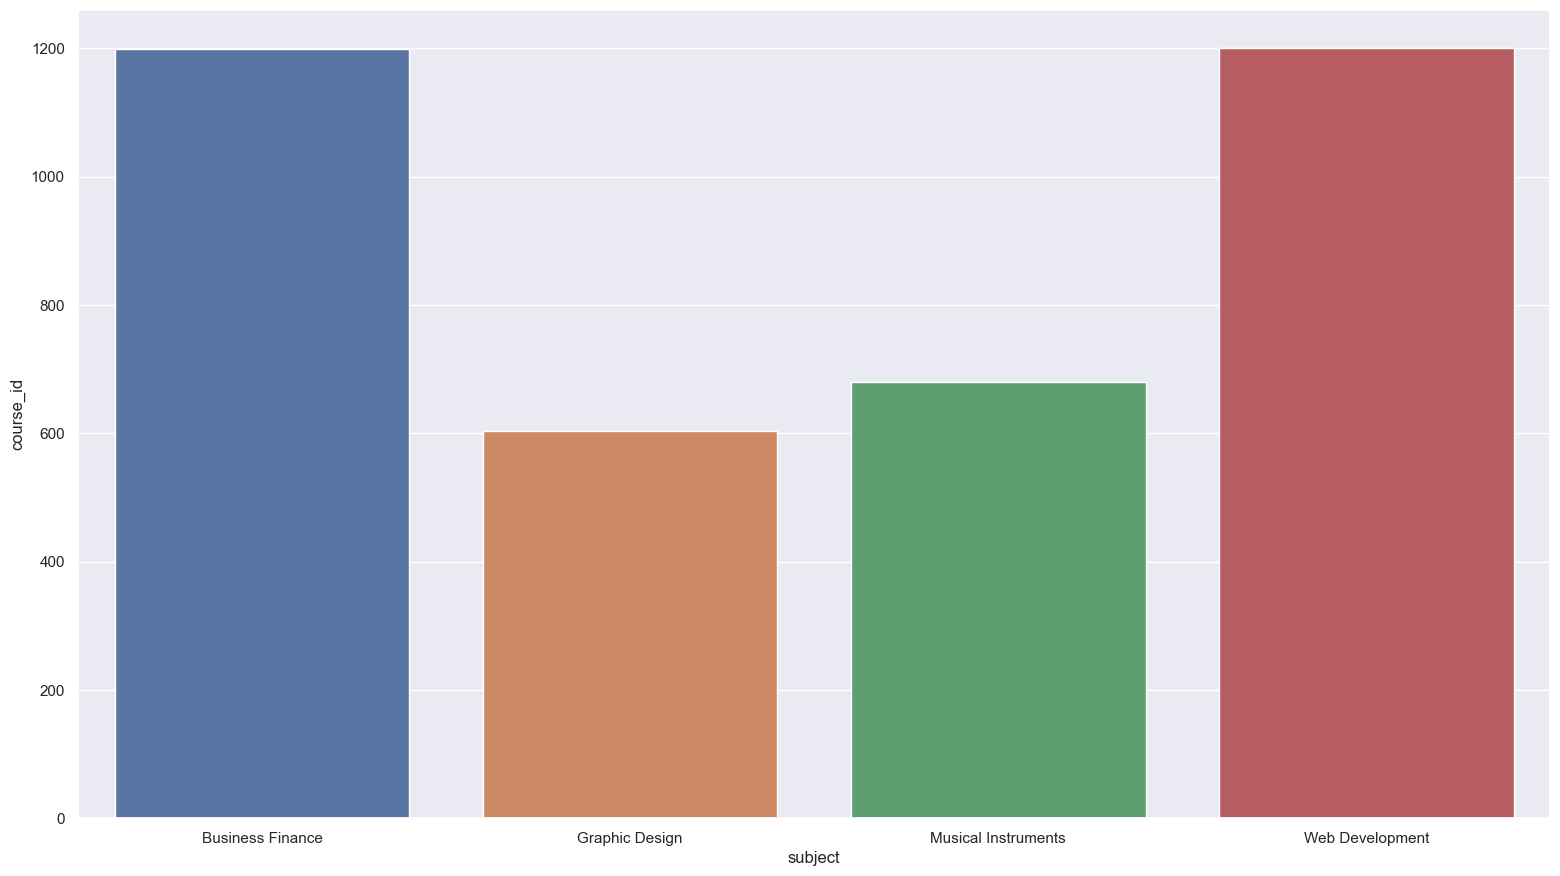

In [10]:
#plotting the data
sns.set(rc={"figure.figsize":(19, 10.5)})
sns.barplot(data=subject_data, x="subject", y="course_id")

In [6]:
#looking at the number of courses by proficiency level
level_data = udemy_df.groupby(by="level", as_index=False)["course_id"].count()
level_data

,level,course_id
0,All Levels,1932
1,Beginner Level,1271
2,Expert Level,58
3,Intermediate Level,421


<AxesSubplot: xlabel='level', ylabel='course_id'>

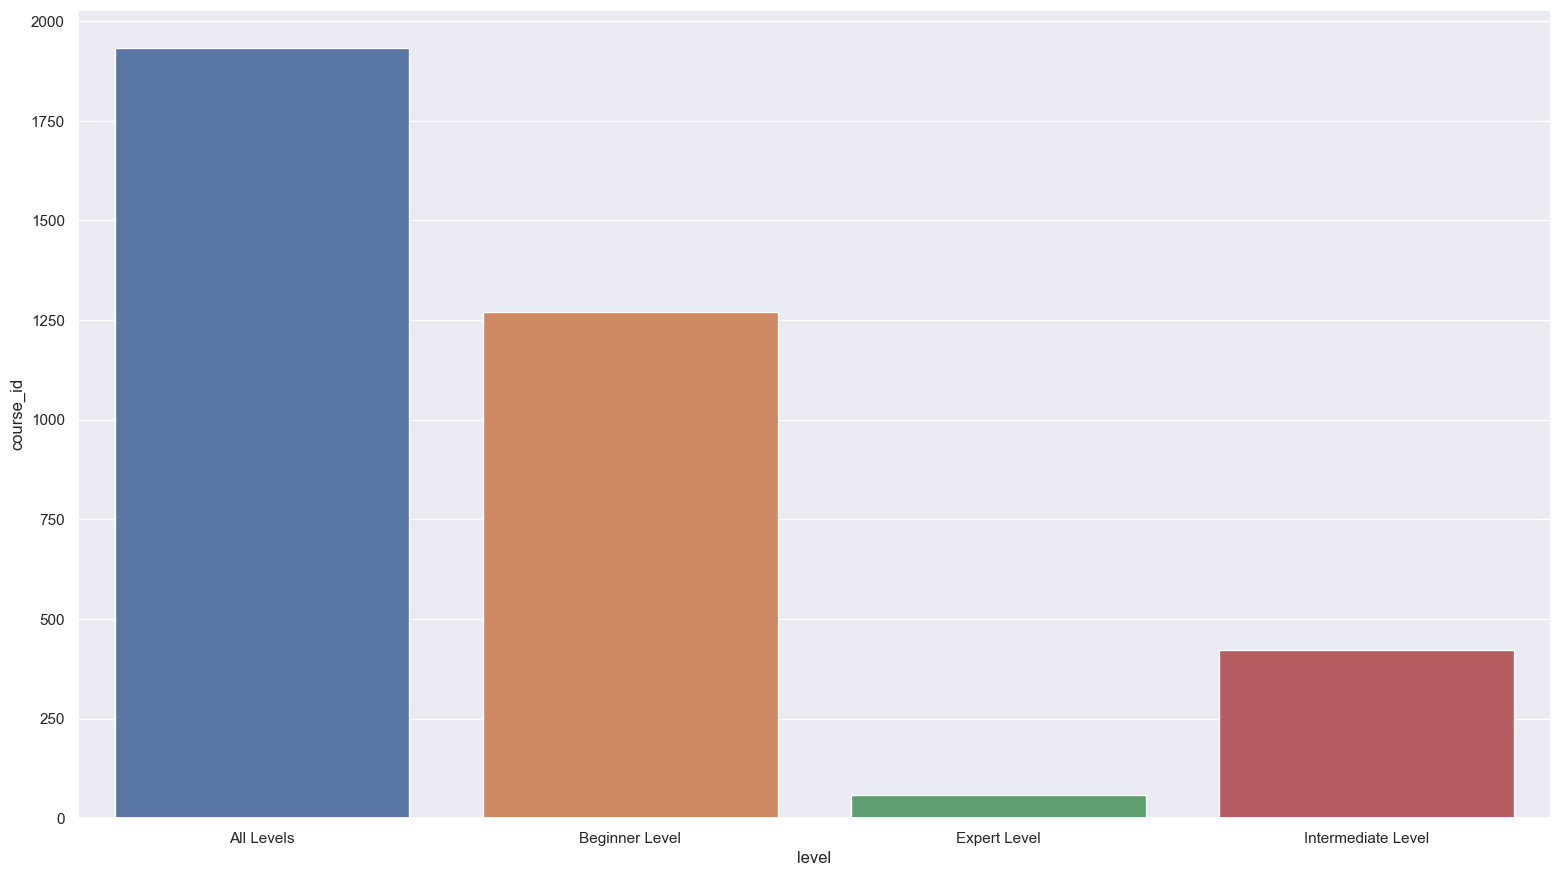

In [7]:
sns.set(rc={"figure.figsize":(19, 10.5)})
sns.barplot(data=level_data, x="level", y="course_id")

In [9]:
#looking at the number of paid versus free courses
pay_data = udemy_df.groupby(by="is_paid", as_index=False)["course_id"].count()
pay_data

,is_paid,course_id
0,False,310
1,True,3372


<AxesSubplot: xlabel='is_paid', ylabel='course_id'>

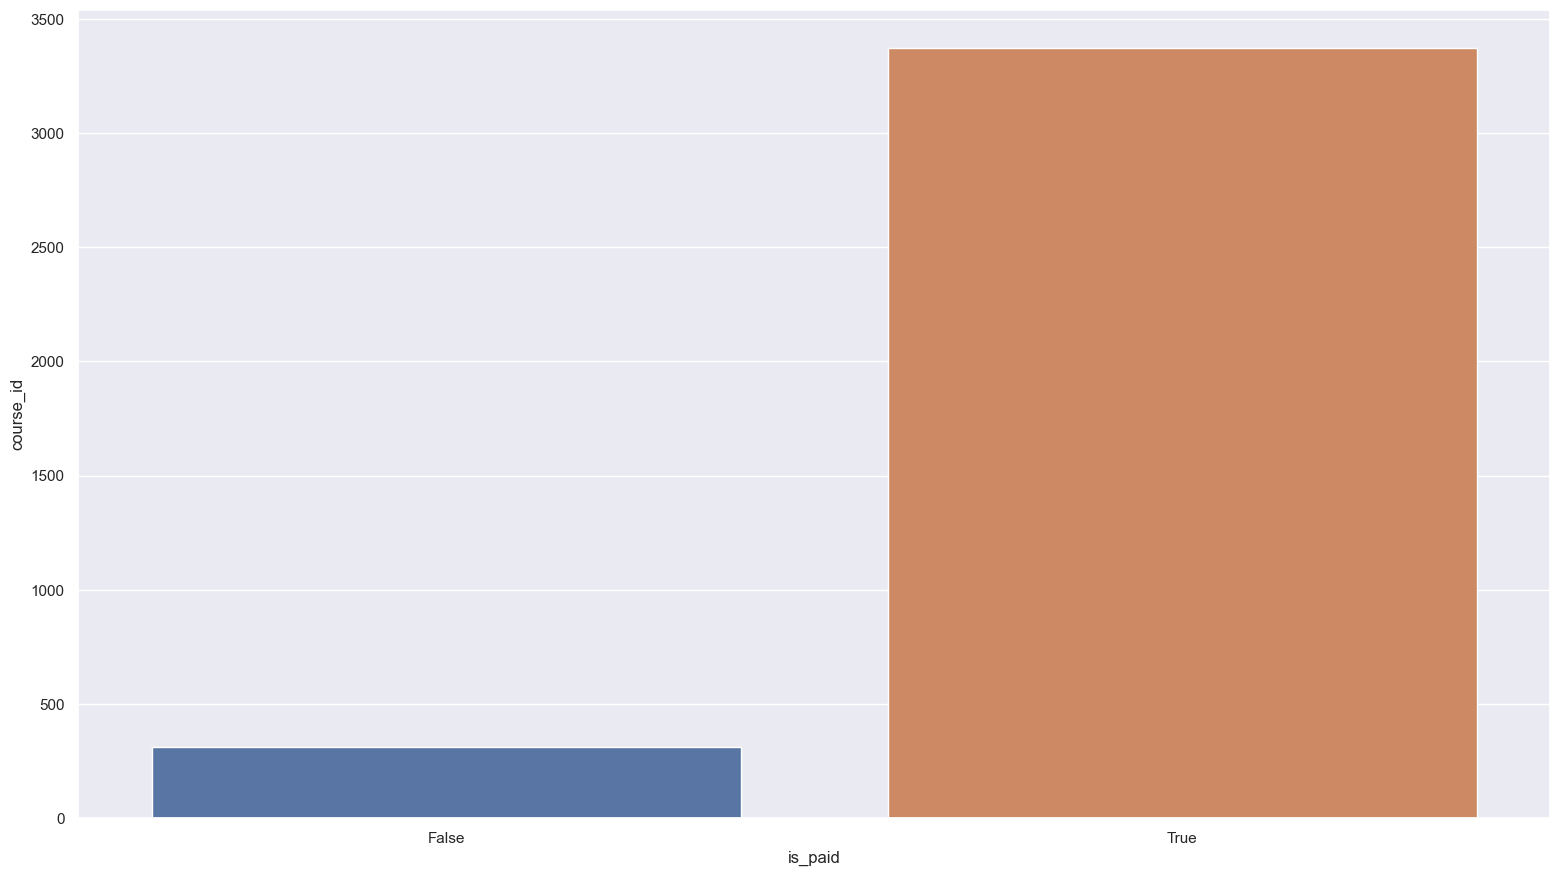

In [10]:
sns.set(rc={"figure.figsize":(19, 10.5)})
sns.barplot(data=pay_data, x="is_paid", y="course_id")

In [15]:
#looking at the number of subscribers for paid and free courses
pay_subscribers = udemy_df.groupby(by="is_paid", as_index=False)["num_subscribers"].sum()
pay_subscribers

,is_paid,num_subscribers
0,False,3575525
1,True,8185631


<AxesSubplot: xlabel='is_paid', ylabel='num_subscribers'>

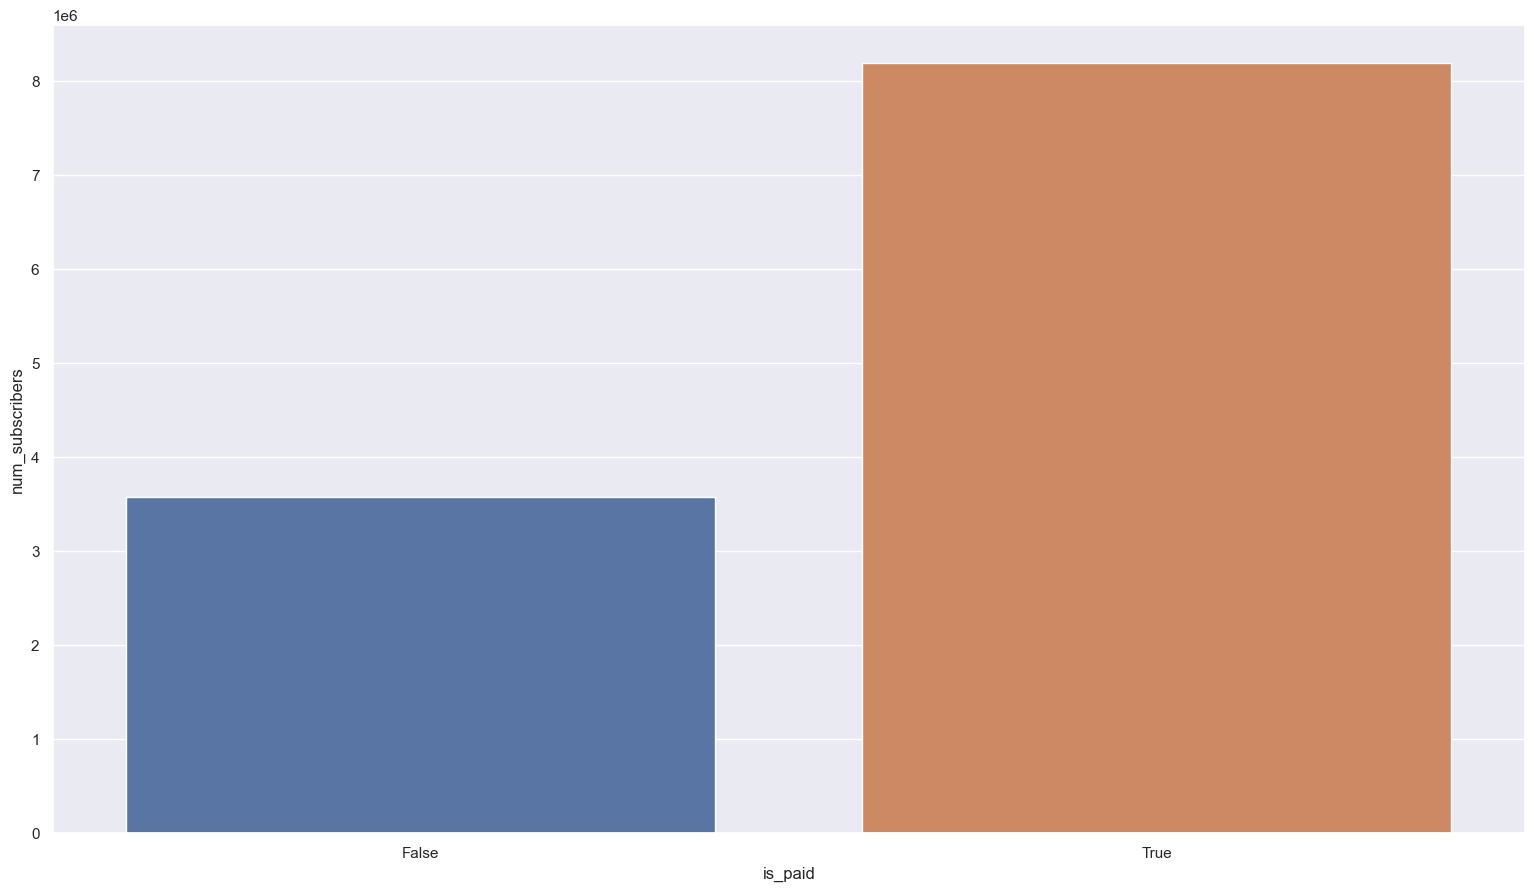

In [16]:
sns.set(rc={"figure.figsize":(19, 10.5)})
sns.barplot(data=pay_subscribers, x="is_paid", y="num_subscribers")

In [11]:
#all udemy courses pertaining to Python
udemy_df[["course_title", "num_subscribers"]].sort_values(by="num_subscribers", ascending=False).head(10)

,course_title,num_subscribers
2230,Learn HTML5 Programming From Scratch,268923
776,Coding for Entrepreneurs Basic,161029
3385,The Web Developer Bootcamp,121584
640,Build Your First Website in 1 Week with HTML5 ...,120291
3316,The Complete Web Developer Course 2.0,114512
1388,Free Beginner Electric Guitar Lessons,101154
3556,Web Design for Web Developers: Build Beautiful...,98867
2233,Learn Javascript & JQuery From Scratch,84897
2886,Practical PHP: Master the Basics and Code Dyna...,83737
2034,JavaScript: Understanding the Weird Parts,79612


In [12]:
#the most popular course
udemy_df[["course_title", "num_reviews"]].sort_values(by="num_reviews", ascending=False).head(1)

,course_title,num_reviews
3385,The Web Developer Bootcamp,27445


In [19]:
udemy_paid_courses = udemy_df[udemy_df["is_paid"] == True]
udemy_paid_courses["price"] = udemy_paid_courses["price"].astype(int)
udemy_paid_courses.dtypes

C:\Users\eddieredmann3\AppData\Local\Temp\ipykernel_1436\1248803246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udemy_paid_courses["price"] = udemy_paid_courses["price"].astype(int)


course_id                            int64
course_title                        object
is_paid                               bool
price                                int32
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                    object
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

Had to convert price to integers here because of free courses

<AxesSubplot: xlabel='price', ylabel='num_subscribers'>

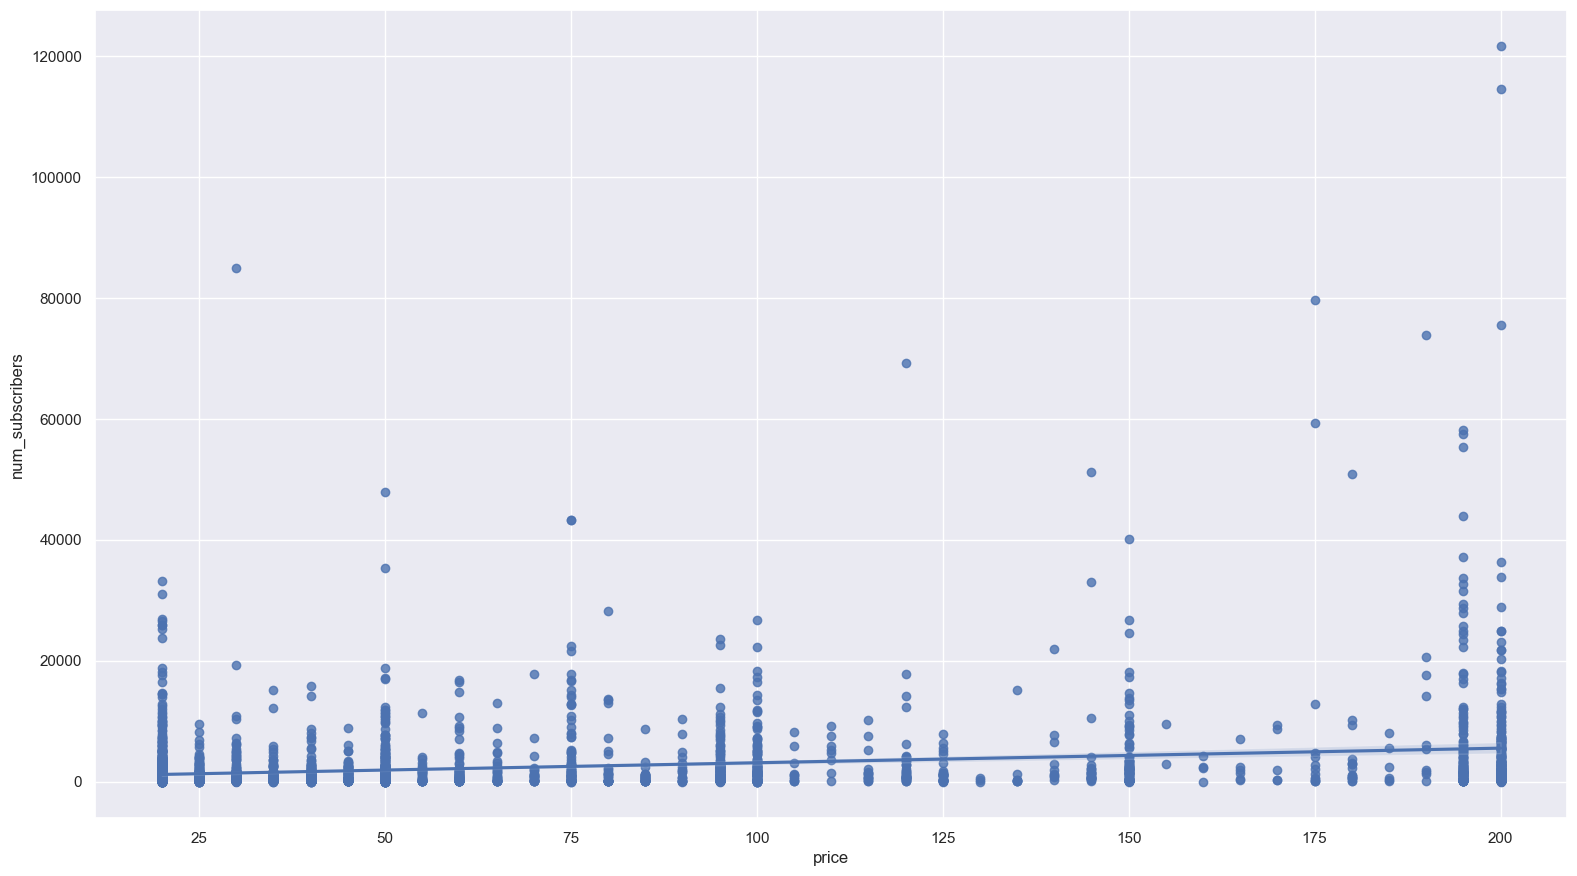

In [20]:
#looking at the relationship between a course's price and the number of subscribers
sns.set(rc={"figure.figsize":(19, 10.5)})
sns.regplot(data=udemy_paid_courses, x="price", y="num_subscribers")

In [21]:
udemy_df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21 23:48:18+00:00,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21 23:44:49+00:00,Musical Instruments


In [22]:
# the number of python courses
is_python_course = udemy_df["course_title"].str.contains(pat="Python", case=False, regex=False)
is_python_course.groupby(is_python_course.values).count()

False    3653
True       29
Name: course_title, dtype: int64

In [23]:
#all of the python courses
python_courses = udemy_df.iloc[is_python_course[is_python_course.values == True].index]
python_courses

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
216,599504,Advanced Scalable Python Web Development Using...,True,120,1299,56,71,Intermediate Level,14 hours,2016-08-11 22:09:24+00:00,Web Development
777,47963,"Coding for Entrepreneurs: Learn Python, Django...",True,195,23412,799,251,All Levels,45 hours,2013-04-08 00:46:14+00:00,Web Development
814,631128,Complete Python Web Course: Build 8 Python Web...,True,110,7489,941,173,All Levels,16 hours,2015-11-08 20:57:35+00:00,Web Development
842,186096,"Core: A Web App Reference Guide for Django, Py...",True,195,2497,98,154,All Levels,26 hours,2014-05-29 00:58:43+00:00,Web Development
1400,394832,Fun and creative web engineering with Python a...,False,Free,10917,319,25,All Levels,2 hours,2015-06-09 19:51:50+00:00,Web Development
1932,1038538,Introduction to QGIS Python Programming,True,85,197,26,28,Beginner Level,3.5 hours,2016-12-22 00:11:22+00:00,Web Development
1969,902888,Investment Portfolio Analysis with Python,True,50,209,13,37,All Levels,7 hours,2016-07-13 21:40:32+00:00,Business Finance
2294,391546,Learn Python and Django: Payment Processing,True,70,17714,198,23,All Levels,3.5 hours,2015-02-09 15:37:56+00:00,Web Development
2295,1063722,Learn Python Django - A Hands-On Course,True,50,1339,21,18,Beginner Level,2 hours,2017-01-18 21:53:34+00:00,Web Development
2341,546848,Learn to code in Python and learn Adobe Photos...,True,50,1132,1,29,All Levels,2 hours,2015-07-08 00:15:12+00:00,Graphic Design


In [24]:
python_courses.sort_values(by="num_subscribers", ascending=False).head(10)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3573,16646,Web Programming with Python,True,50,35267,217,53,All Levels,4 hours,2012-04-25 00:01:43+00:00,Web Development
777,47963,"Coding for Entrepreneurs: Learn Python, Django...",True,195,23412,799,251,All Levels,45 hours,2013-04-08 00:46:14+00:00,Web Development
2294,391546,Learn Python and Django: Payment Processing,True,70,17714,198,23,All Levels,3.5 hours,2015-02-09 15:37:56+00:00,Web Development
2955,822444,Python and Django Full Stack Web Developer Boo...,True,200,11832,1883,191,All Levels,31.5 hours,2017-02-24 18:40:55+00:00,Web Development
1400,394832,Fun and creative web engineering with Python a...,False,Free,10917,319,25,All Levels,2 hours,2015-06-09 19:51:50+00:00,Web Development
3272,938560,The Complete Ethical Hacking Course 2.0: Pytho...,True,195,7827,268,66,All Levels,11 hours,2016-09-26 15:08:29+00:00,Web Development
814,631128,Complete Python Web Course: Build 8 Python Web...,True,110,7489,941,173,All Levels,16 hours,2015-11-08 20:57:35+00:00,Web Development
3460,76052,Try Django 1.9 | Build a Blog and Learn Python...,True,50,7407,172,147,All Levels,20 hours,2014-03-04 07:12:21+00:00,Web Development
2956,477702,Python for Beginners: Python Programming Langu...,True,150,6153,125,84,Beginner Level,5 hours,2015-06-14 18:18:57+00:00,Web Development
3013,970600,REST APIs with Flask and Python,True,110,5151,737,115,Intermediate Level,12.5 hours,2016-11-06 19:00:38+00:00,Web Development


In [25]:
udemy_df["release_year"] = udemy_df["published_timestamp"].dt.year
udemy_df["release_year"]

0       2014
1       2017
2       2017
3       2017
4       2017
        ... 
3677    2015
3678    2015
3679    2015
3680    2017
3681    2016
Name: release_year, Length: 3682, dtype: int64

<AxesSubplot: xlabel='release_year', ylabel='count'>

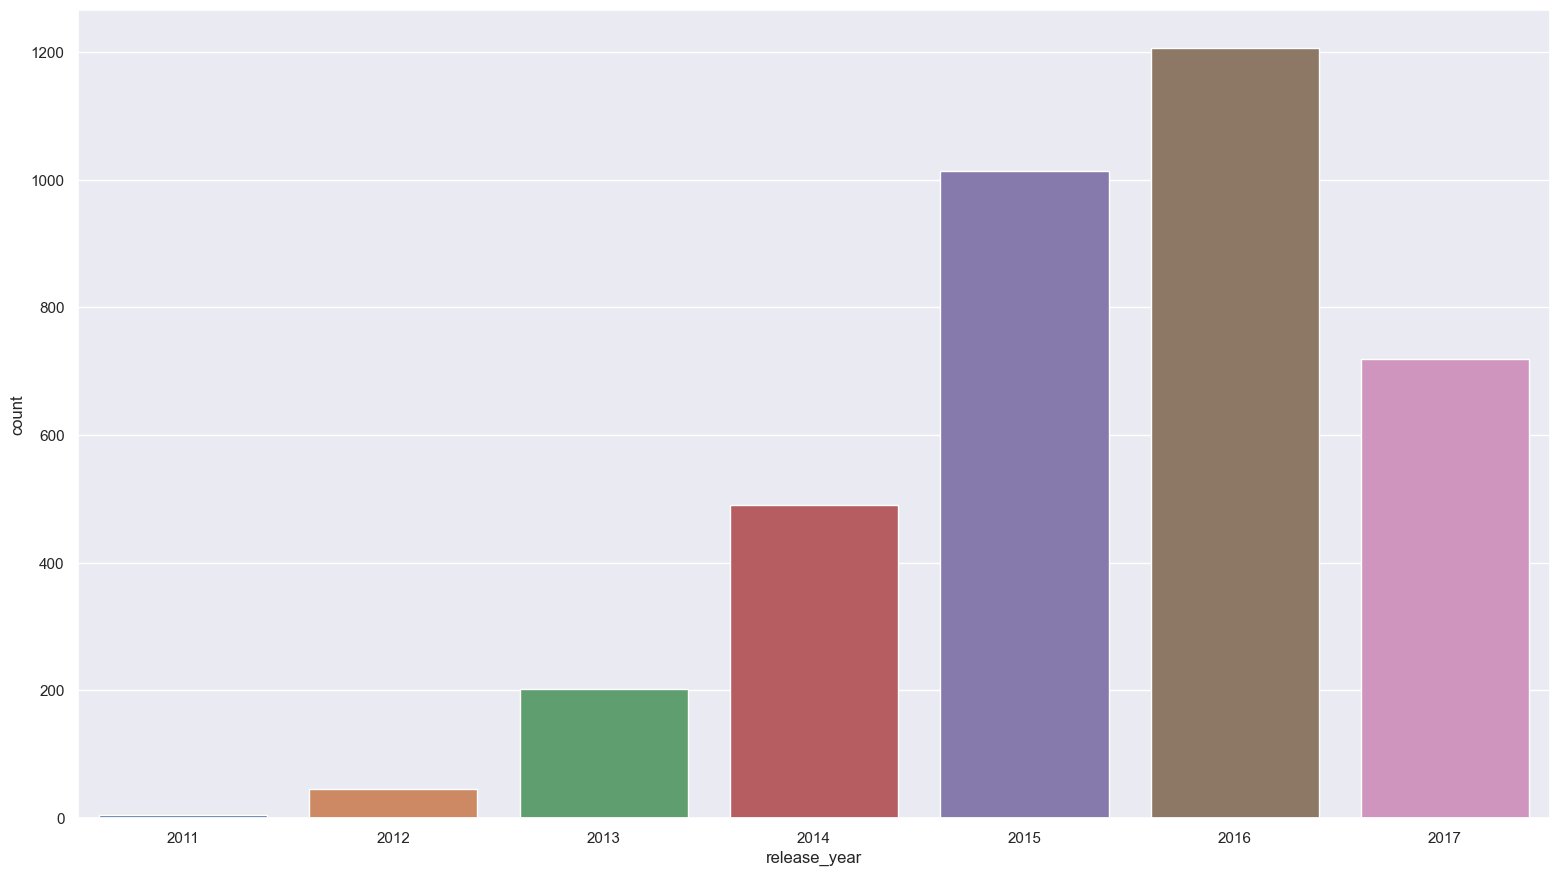

In [26]:
#the number of courses by release year
sns.set(rc={"figure.figsize":(19, 10.5)})
sns.countplot(data=udemy_df, x="release_year")

Personal Insights

In [27]:
udemy_df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,release_year
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments,2017
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments,2017
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21 23:48:18+00:00,Musical Instruments,2017
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21 23:44:49+00:00,Musical Instruments,2017


<AxesSubplot: xlabel='num_lectures', ylabel='num_subscribers'>

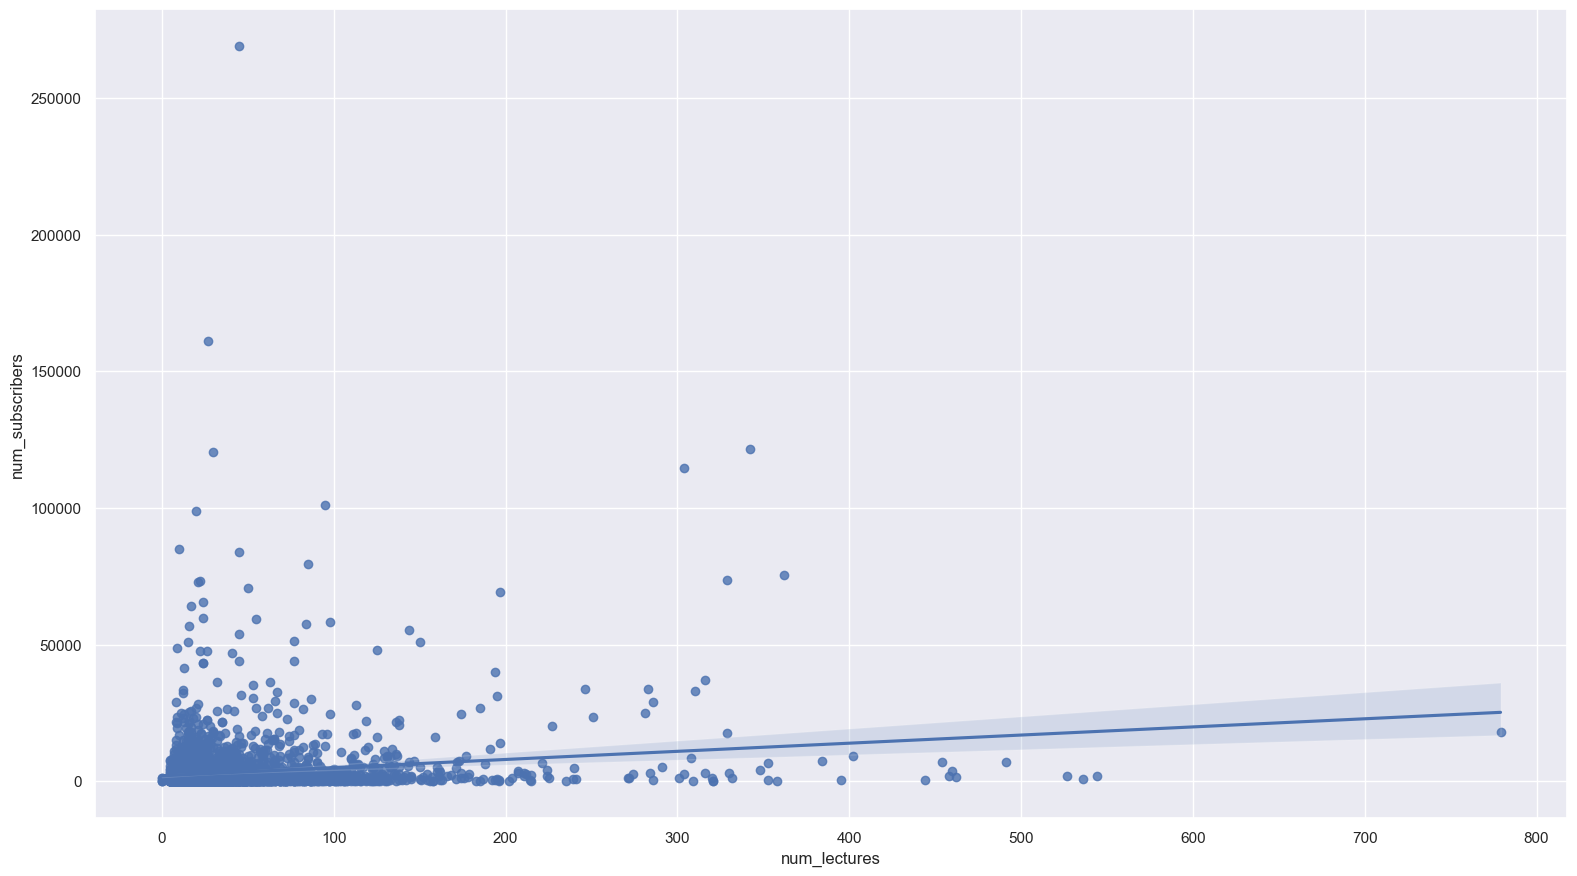

In [13]:
# a regression plot of the number of lectures versus subscribers
sns.set(rc={"figure.figsize":(19, 10.5)})
sns.regplot(data=udemy_df, x="num_lectures", y="num_subscribers")

<AxesSubplot: xlabel='num_lectures', ylabel='num_reviews'>

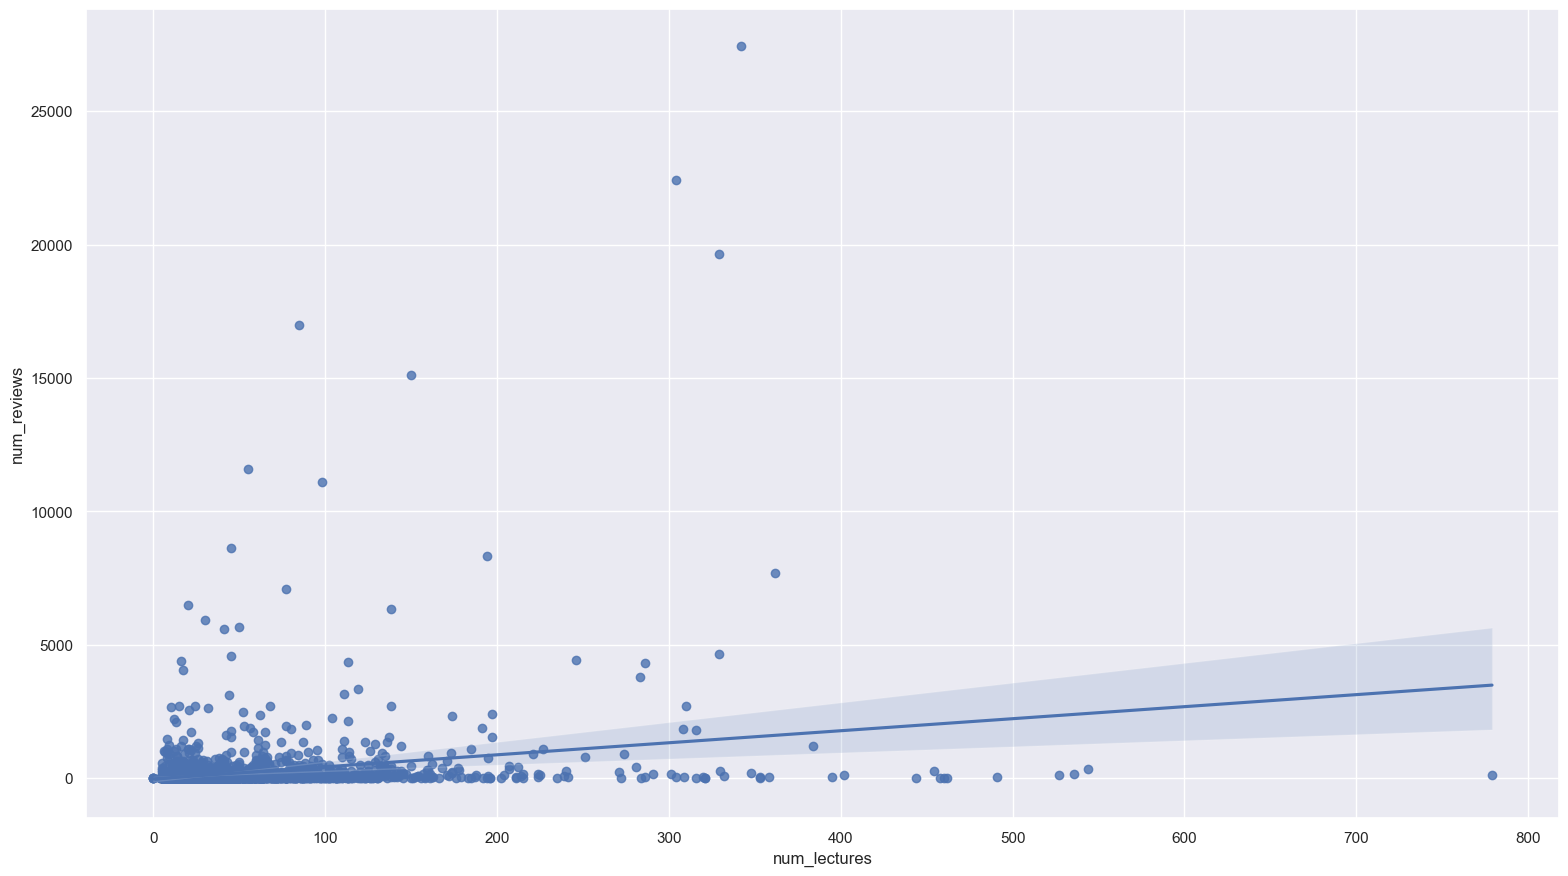

In [14]:
#a regression plot of the number of lectures versus reviews
sns.set(rc={"figure.figsize":(19, 10.5)})
sns.regplot(data=udemy_df, x="num_lectures", y="num_reviews")

<AxesSubplot: xlabel='num_subscribers', ylabel='num_reviews'>

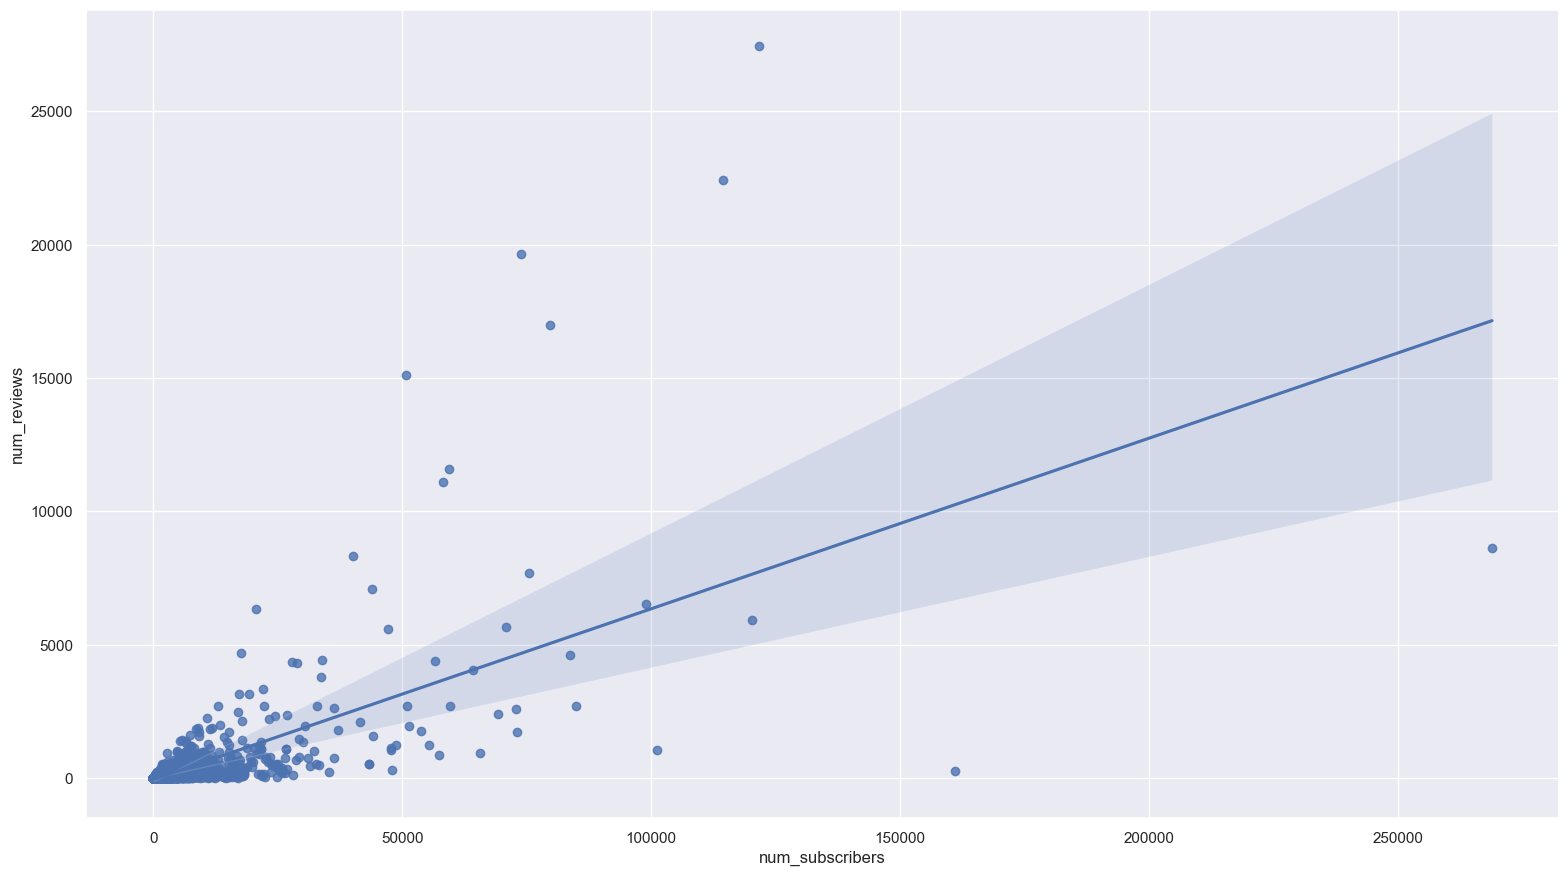

In [15]:
#subscribers versus reviews
sns.set(rc={"figure.figsize":(19, 10.5)})
sns.regplot(data=udemy_df, x="num_subscribers", y="num_reviews")